# Лабораторная работа №5: Исследование результатов фильтрации дискретного сигнала с помощью нерекурсивных фильтров, построенных на основе полиномиальных приближений

Выполнили студенты гр. 9383 Мосин Константин, Нистратов Дмитрий и Соседков Кирилл. Вариант №6

## Цель работы

Получение практических навыков выполнения фильтрации дискретных последовательностей с помощью полиномиальных фильтров, а также анализа получаемых результатов с помощью дискретного преобразования Фурье (ДПФ).

## Основные теоретические положения

### Дискретное преобразование Фурье

$$S(k) = \sum_{n=0}^{N-1}s(n)e^{-i\frac{2\pi}{N}nk}$$


### Линейное сглаживание по 5-ти точкам

$$\hat y_n = \frac {1}{5} \sum_{k=n-2}^{n+2} y_k$$

Принимая $ s_n = e^{iwn}$ получим:

$$H(w) = \frac {1}{5} \sum_{k=n-2}^{n+2} e^{iwk} = \frac {1}{5} (2cos(w) + 2cos(2w) + 1)$$

### Линейное сглаживание по 9-ти точкам

$$\hat y_n = \frac {1}{9} \sum_{k=n-4}^{n+4} y_k$$

Принимая $ s_n = e^{iwn}$ получим:

$$H(w) = \frac {1}{9} \sum_{k=n-4}^{n+4} e^{iwk} = \frac {1}{9} (2cos(w) + 2cos(2w) + 2cos(3w) + 2cos(4w) + 1)$$


### Сглаживание полиномом 2-ой степени по 5 точкам

$$\hat y_n = \frac {1}{35} (-3s_{n-2} + 12s_{n-1} + 17s_{n} + 12s_{n+1} - 3s_{n+2})$$

Принимая $ s_n = e^{iwn}$ получим:

$$H(w) = \frac {1}{35} (17 + 24cos(w) - 6cos(2w))$$

### Сглаживание полиномом 2-ой степени по 9 точкам

$$\hat y_n = \frac{1}{231}(-21s_{n-4}+14s_{n-3}+39s_{n-2}+54s_{n-1}+59s_{n}+54s_{n+1}+39s_{n+2}+14s_{n+3}-21s_{n+4})$$ 

Принимая $ s_n = e^{iwn}$ получим:

$$H(\omega)= \frac{1}{231}(59+108cos(\omega)+78cos(2\omega)+28cos(3\omega)-42cos(4\omega))$$ 

### Сглаживание полиномом 4-ой степени по 7 точкам

$$\hat y_n = \frac {1}{231} (5s_{n-3} - 30s_{n-2} + 75s_{n-1} + 131s_n + 75s_{n+1} - 30s_{n+2} + 5s_{n+3})$$

Принимая $ s_n = e^{iwn}$ получим:

$$H(w) = \frac {1}{231}(150cos(w) - 60cos(2w) + 10cos(3w) + 131)$$

### Сглаживание полиномом 4-ой степени по 11 точкам

$$\hat y_n = \frac {1}{429} (13s_{n-5} - 45s_{n-4} - 10s_{n-3} + 60s_{n-2} + 120s_{n-1} + 143s_n + 120s_{n+1} + 60s_{n+2} - 10s_{n+3} - 45s_{n+4} - 13s_{n+5})$$

Принимая $ s_n = e^{iwn}$ получим:

$$H(w) = \frac {1}{429}(240cos(w) + 120cos(2w) - 20cos(3w) - 90cos(4w) + 36cos(5w) + 143)$$


## Постановка задачи

Для заданного дискретного сигнала применить фильтры, основанные на сглаживании полиномами. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

Пункты работы выполняется с помощью кода.

In [69]:
import numpy as np
import matplotlib.pyplot as plt

#### Пункт 1

Сформировать дискретный сигнал посредством дискретизации с шагом $T=1$ непрерывного сигнала, представляющего собой линейную комбинацию косинусоид вида $A_k\cos({\omega}_kt+{\varphi}_k)$.  Частота каждой из гармоник не должна превышать $\pi$. Всего одиннадцать гармоник с упорядоченными по возрастанию частотами от 0 до $\pi$, изменяющимися с шагом $\Delta \omega=0.1\pi$. Амплитуды гармоник $A_k$ представляют собой целые числа со значениями от 1 до 11, определяемые случайным образом с помощью датчика равномерно распределенных случайных чисел. При необходимости нормализовать коэффициенты линейной комбинации посредством деления их на сумму полученных случайным образом амплитуд. Начальные фазы ${\varphi}_k$ представляют собой случайные числа в промежутке от 0 до 0.5. Дискретная последовательность должна включать в себя 32 отсчета $(N=31)$.

In [70]:
A = np.random.randint(low=1, high=11, size=11)
A = A / sum(A)
w = np.array([i/10 * np.pi for i in range(11)])
phi = np.random.random_sample(11) / 2

def f(t):
    y = 0
    for Ak, wk, phik in zip(A, w, phi):
        y += Ak * np.cos(wk * t + phik)
    return y

#### Пункт 2

Визуализировать исходные аналоговый и дискретизированный сигналы.

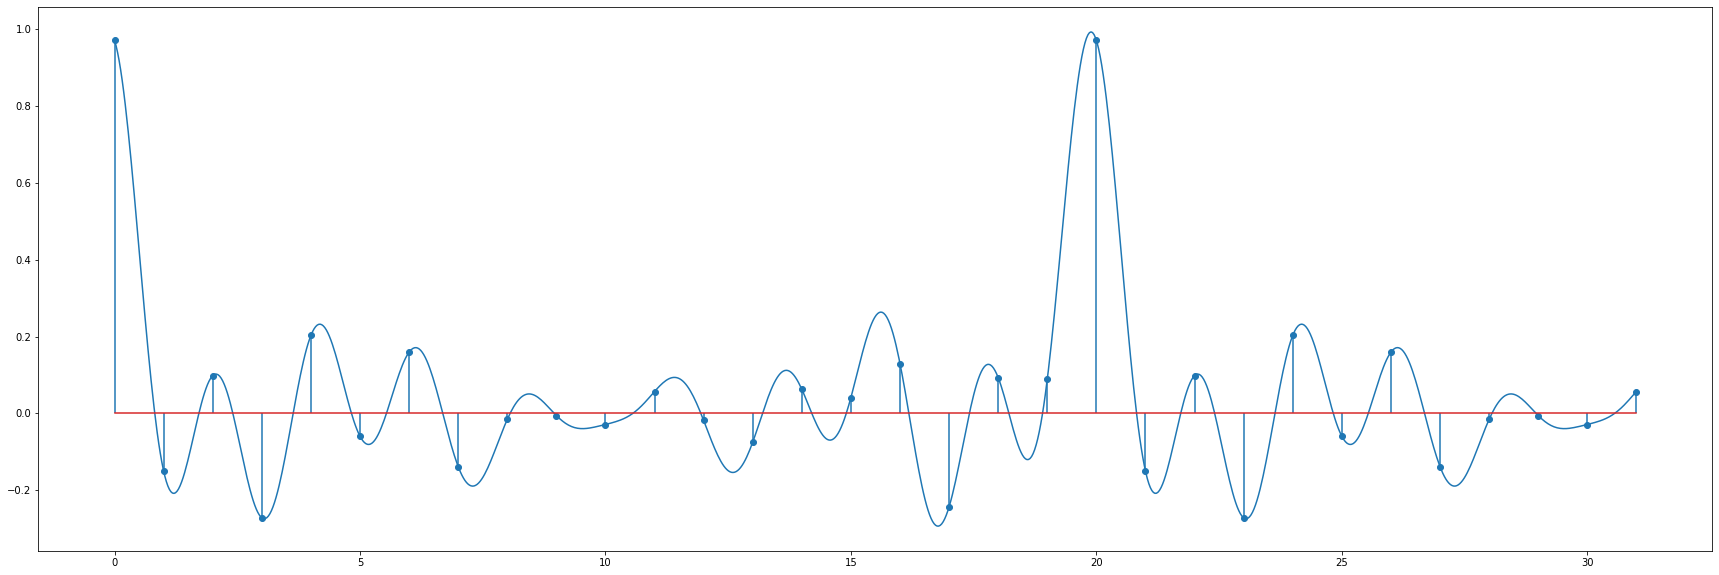

In [71]:
x = np.linspace(0, 31, 1000)
x_ = np.linspace(0, 31, 32)

plt.rcParams['figure.figsize'] = [30, 10]

plt.plot(x, f(x))
plt.stem(x_, f(x_))

plt.show()

#### Пункт 3
С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала и визуализировать их.

In [72]:
def DFT(signal, sampling_rate = 1):
    N = len(signal)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    dft_amp = np.dot(e.real, signal)

    N = len(dft_amp)
    n = np.arange(N)
    T = N/sampling_rate
    dft_freq = n/T

    return (dft_freq, dft_amp)

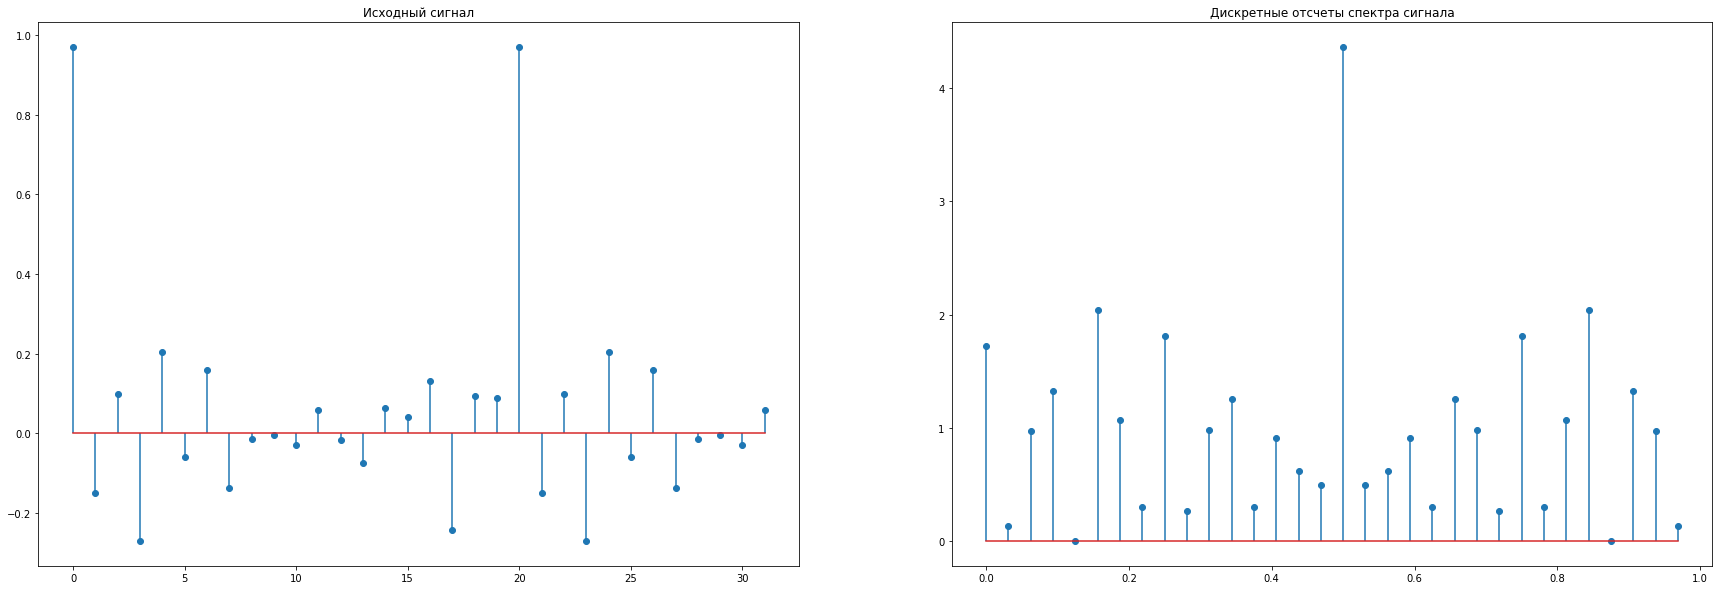

In [73]:
fig, axs = plt.subplots(1, 2)

axs[0].stem(x_, f(x_))
axs[0].set_title('Исходный сигнал')

freq, amp = DFT(f(x_))

axs[1].stem(freq, abs(amp))
axs[1].set_title('Дискретные отсчеты спектра сигнала')

plt.show()

#### Пункт 4

Для дискретного сигнала применить линейное сглаживание по 5-ти и 9-ти точкам, представить формулу для H(ω) – передаточной функции (частотной характеристики) фильтра.

In [74]:
linear_smoothing = lambda y, dots: np.convolve(y, np.ones(dots), 'same')/dots

#### Пункт 5

Визуализировать полученный после фильтрации дискретный сигнал совместно с исходным дискретным сигналом.

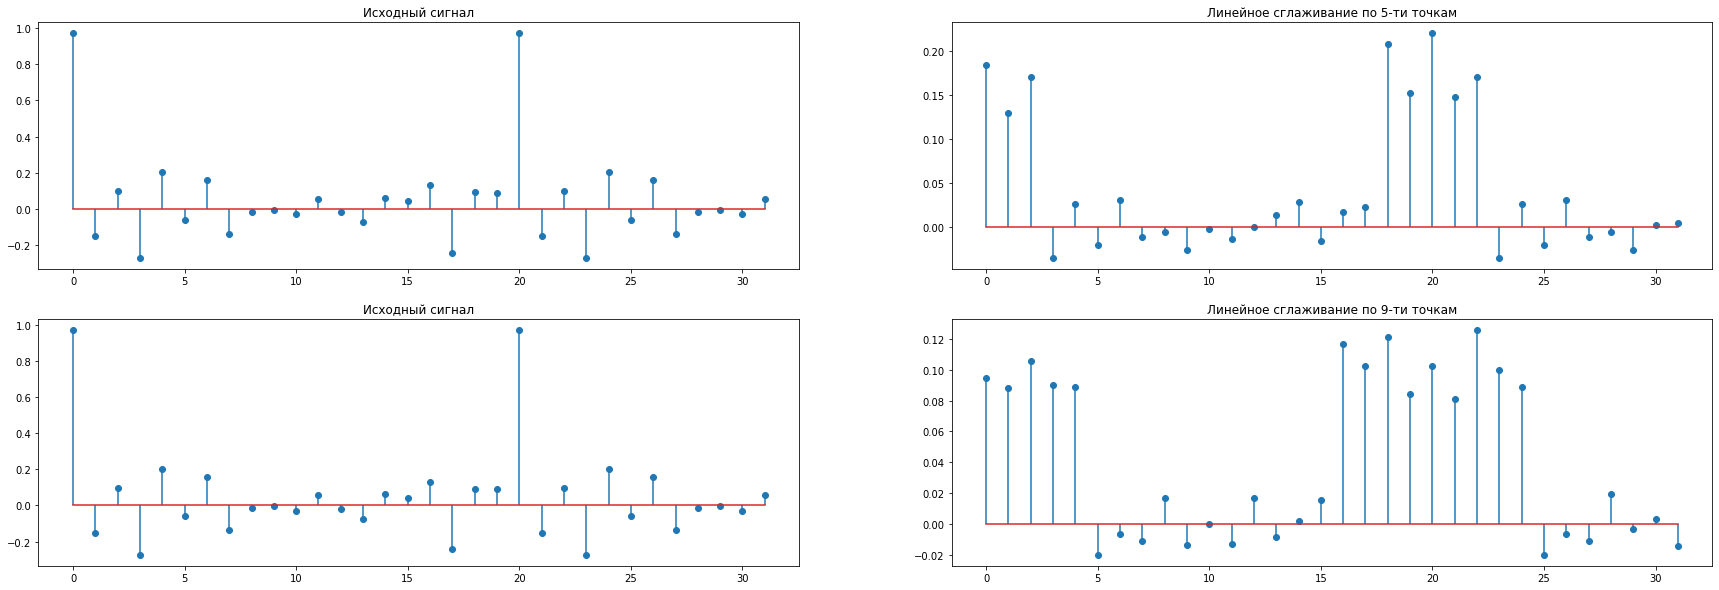

In [75]:
fig, axs = plt.subplots(2, 2)

plt.rcParams['figure.figsize'] = [40, 10]


axs[0][0].stem(x_, f(x_))
axs[0][0].set_title('Исходный сигнал')

axs[0][1].stem(x_, linear_smoothing(f(x_), 5))
axs[0][1].set_title('Линейное сглаживание по 5-ти точкам')

axs[1][0].stem(x_, f(x_))
axs[1][0].set_title('Исходный сигнал')

axs[1][1].stem(x_, linear_smoothing(f(x_), 9))
axs[1][1].set_title('Линейное сглаживание по 9-ти точкам')


plt.show()

#### Пункт 6
С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала после его фильтрации и визуализировать их совместно с отчетами спектра исходного дискретного сигнала.

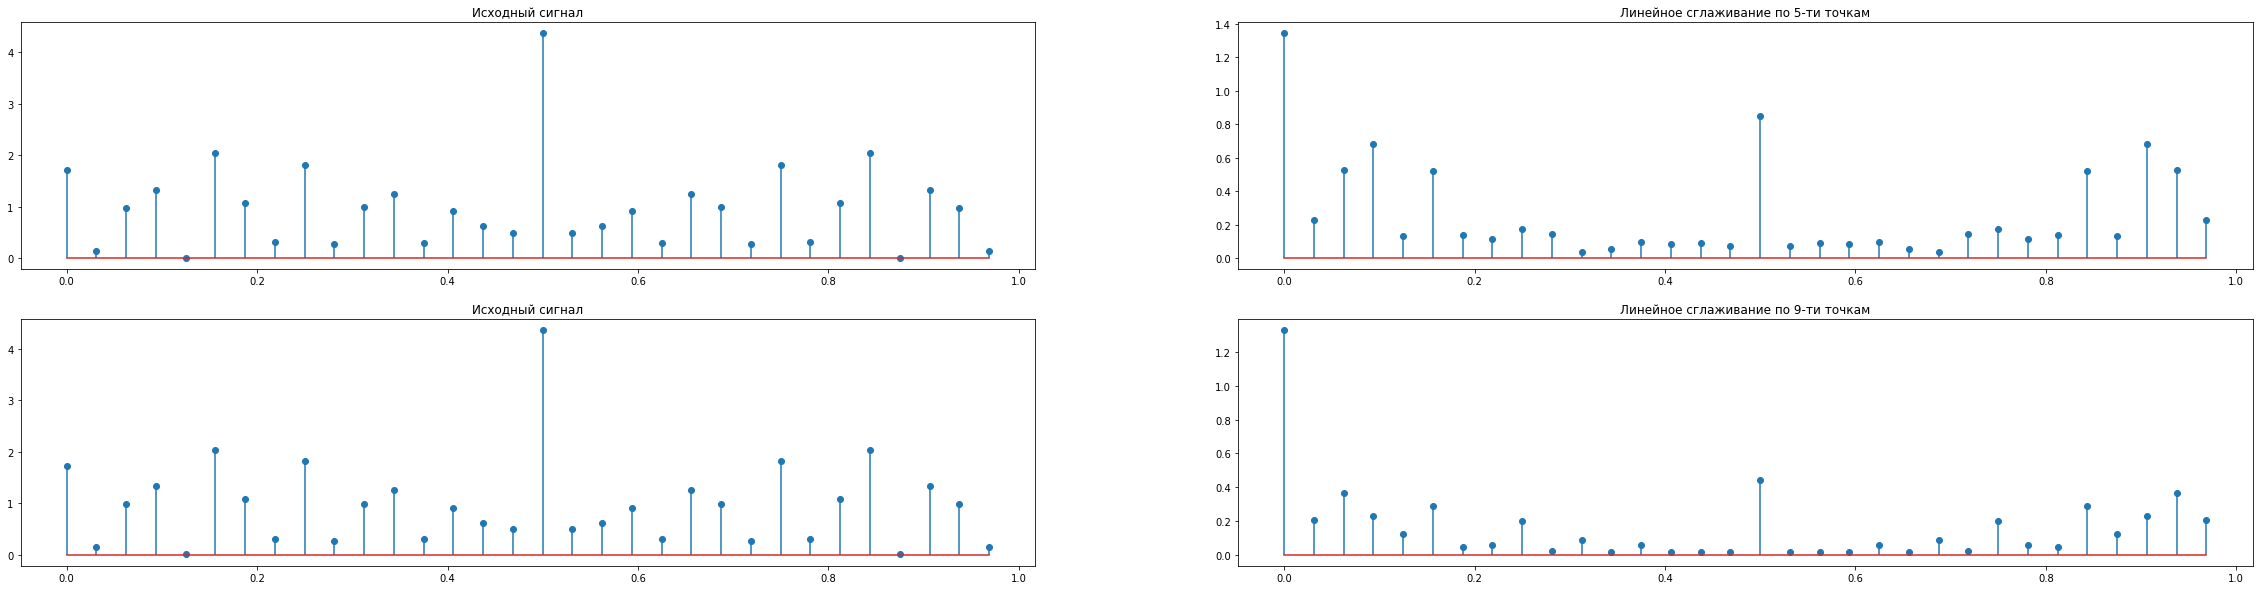

In [76]:
fig, axs = plt.subplots(2, 2)


freq_default, amp_default = DFT(f(x_))

axs[0][0].stem(freq_default, abs(amp_default))
axs[0][0].set_title('Исходный сигнал')


freq, amp = DFT(linear_smoothing(f(x_), 5))

axs[0][1].stem(freq, abs(amp))
axs[0][1].set_title('Линейное сглаживание по 5-ти точкам')


axs[1][0].stem(freq_default, abs(amp_default))
axs[1][0].set_title('Исходный сигнал')

freq, amp = DFT(linear_smoothing(f(x_), 9))

axs[1][1].stem(freq, abs(amp))
axs[1][1].set_title('Линейное сглаживание по 9-ти точкам')

plt.show()


#### Пункт 7
Проанализировать результат на соответствие значениям H(ω). Сделать выводы.

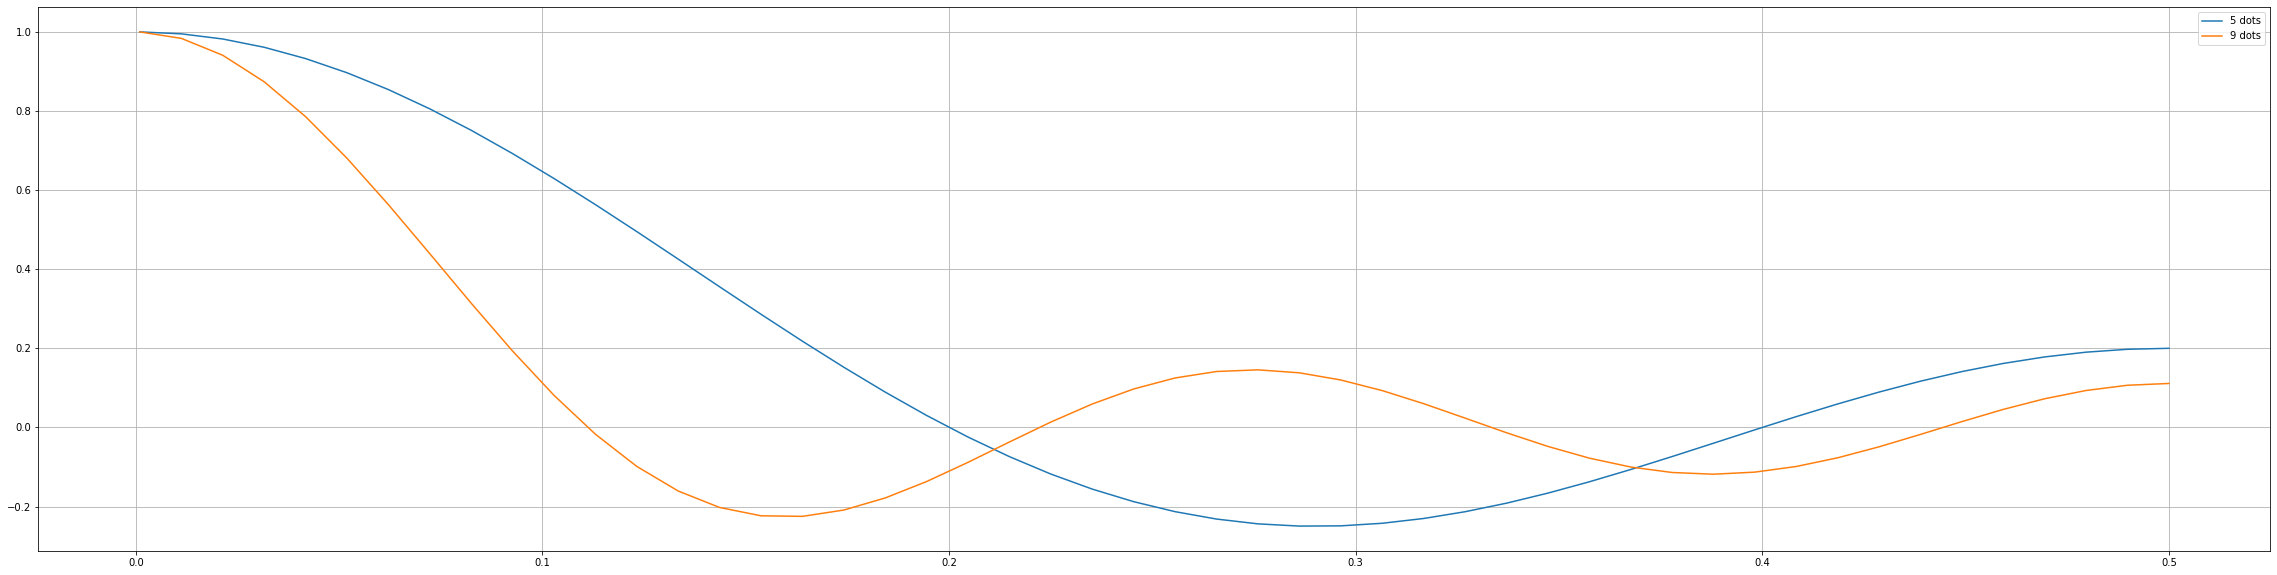

In [77]:
H_w = lambda m, w: (np.sin((2 * m + 1) * w / 2)) / ((2 * m + 1) * np.sin(w / 2))
x = np.linspace(0.001, 0.5)

plt.plot(x, H_w(2, x * 2 * np.pi), label='5 dots') # 2 * 2 + 1 = 5 точек
plt.plot(x, H_w(4, x * 2 * np.pi), label='9 dots') # 9 точек
plt.grid() # сеточка
plt.legend() # легенда
plt.show()

Сравнивая дискретные отсчеты спектра дискретного сигнала после его фильтрации с передаточной функцией, можно сделать следующие выводы:
* тенденция дискретного сигнала после его фильтрации соответствует тенденции передаточной функции
* чем выше частота, тем больше сглажена амплитуда гармоник
* подавление амплитуды больше по 9 точкам, чем по 5

#### Пункт 8

Повторить п. 4–7 для следующих фильтров:



- Сглаживание полиномом 2-ой степени по 5 и 9 узлам.
- Сглаживание полиномом 4-ой степени по 7 и 11 узлам.



#### Пункт 8.4a

Для дискретного сигнала применить дискретный фильтр, соответствующий cглаживанию полиномом 2-ой степени по 5 и 9 узлам. Представить формулу для H(ω) – передаточной функции (частотной характеристики) фильтра.

In [78]:
def clamped(index, signal):
    if index < 0: return 0
    if index >= len(signal): return 0
    return signal[index]

def poly_5(signal):
    y = []
    for i in range(0, len(signal)):
        y.append(
            1/35*(-3*clamped(i-2, signal) + 12*clamped(i-1, signal) + 17*clamped(i, signal) + 12*clamped(i+1, signal) - 3*clamped(i+2, signal))
        )
    return y

def poly_9(signal):
    y = []
    for i in range(0, len(signal)):
        y.append(
            1/231*(-21*clamped(i-4, signal) + 14*clamped(i-3, signal) + 39*clamped(i-2, signal) + 54*clamped(i-1, signal) + 59*clamped(i, signal)
                + 54*clamped(i+1, signal) + 39*clamped(i+2, signal) + 14*clamped(i+3, signal) - 21*clamped(i+4, signal)
            )
        )
    return y

#### Пункт 8.5a

Визуализировать полученный после фильтрации дискретный сигнал совместно с исходным дискретным сигналом.

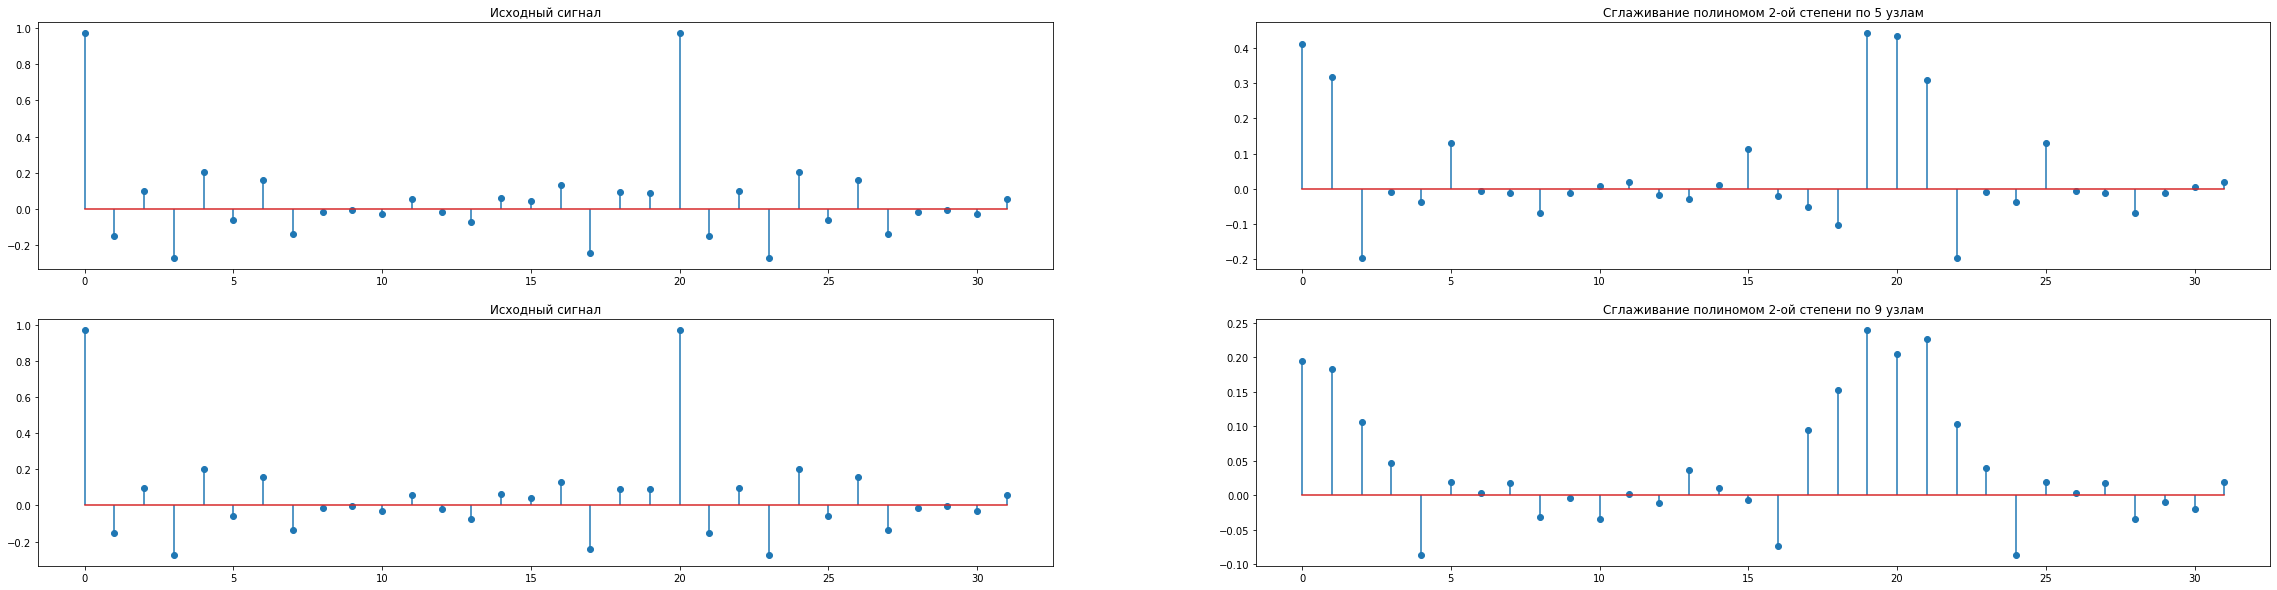

In [79]:
fig, axs = plt.subplots(2, 2)

plt.rcParams['figure.figsize'] = [40, 10]


axs[0][0].stem(x_, f(x_))
axs[0][0].set_title('Исходный сигнал')

axs[0][1].stem(x_, poly_5(f(x_)))
axs[0][1].set_title('Сглаживание полиномом 2-ой степени по 5 узлам')


axs[1][0].stem(x_, f(x_))
axs[1][0].set_title('Исходный сигнал')

axs[1][1].stem(x_, poly_9(f(x_)))
axs[1][1].set_title('Сглаживание полиномом 2-ой степени по 9 узлам')

plt.show()

#### Пункт 8.6a
С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала после его фильтрации и визуализировать их совместно с отчетами спектра исходного дискретного сигнала.

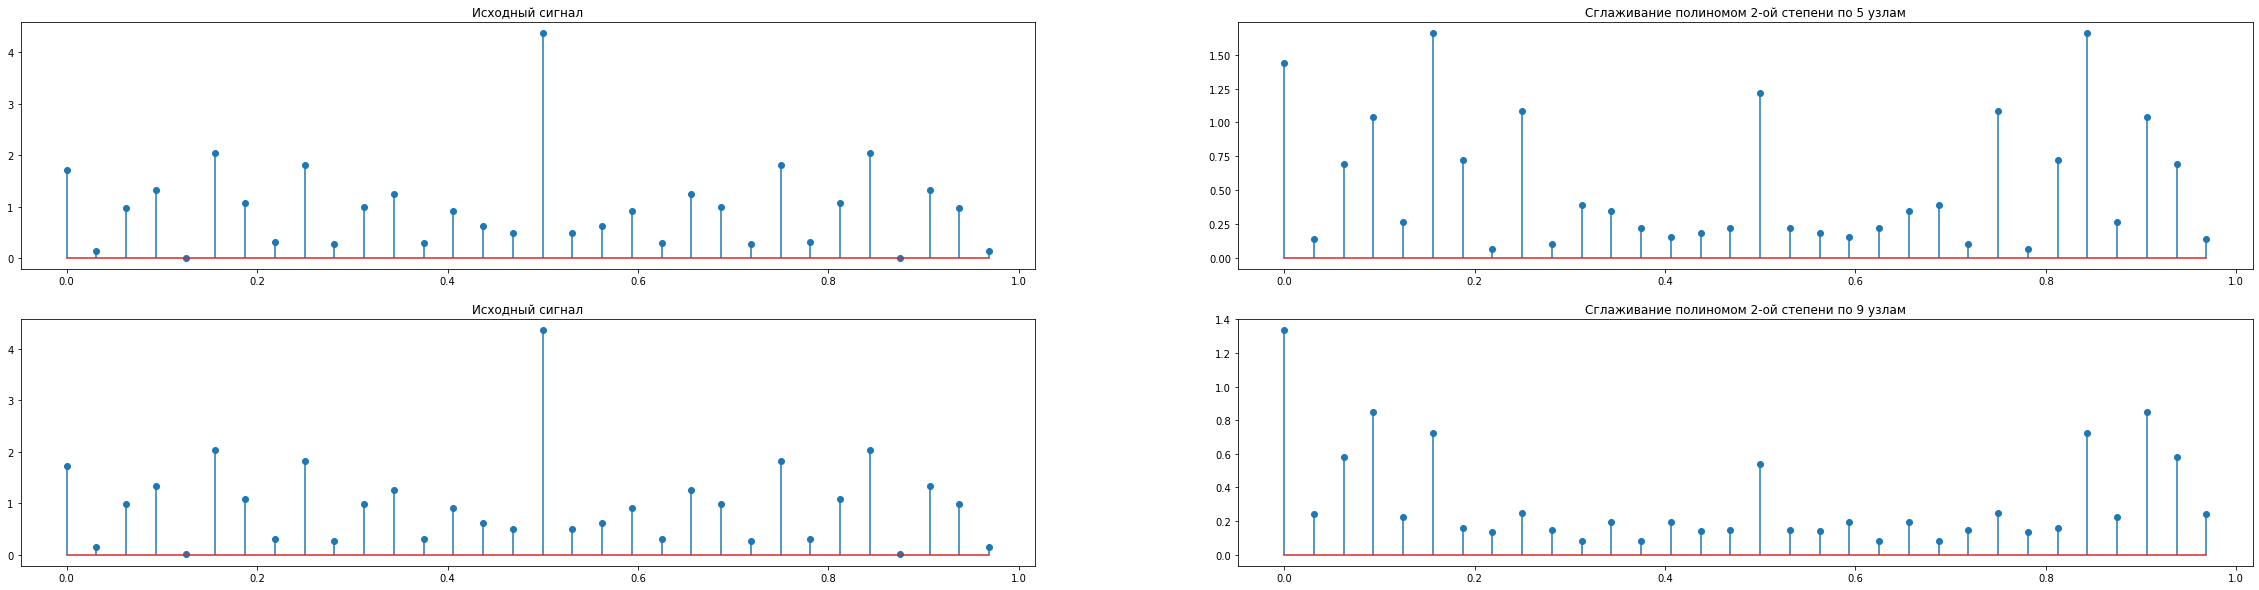

In [80]:
fig, axs = plt.subplots(2, 2)


freq_default, amp_default = DFT(f(x_))

axs[0][0].stem(freq_default, abs(amp_default))
axs[0][0].set_title('Исходный сигнал')

freq, amp = DFT(poly_5(f(x_)))

axs[0][1].stem(freq, abs(amp))
axs[0][1].set_title('Сглаживание полиномом 2-ой степени по 5 узлам')


axs[1][0].stem(freq_default, abs(amp_default))
axs[1][0].set_title('Исходный сигнал')

freq, amp = DFT(poly_9(f(x_)))

axs[1][1].stem(freq, abs(amp))
axs[1][1].set_title('Сглаживание полиномом 2-ой степени по 9 узлам')

plt.show()

#### Пункт 8.7a

Проанализировать результат на соответствие значениям H(ω). Сделать выводы.

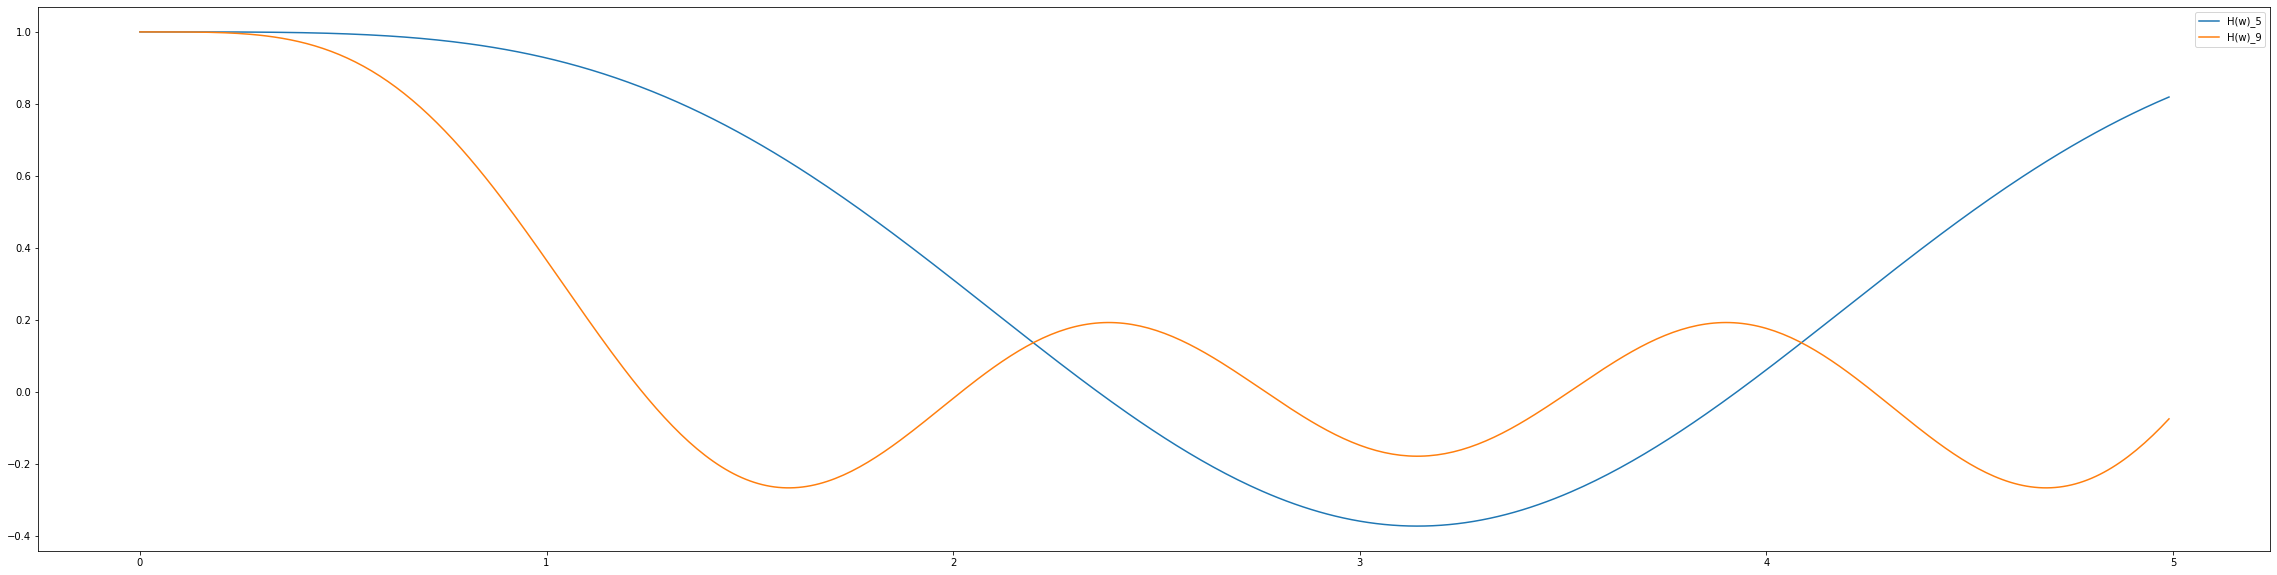

In [81]:
x = np.arange(0, 5, 0.01)

Hw5 = lambda w: 1/35*(17+24*np.cos(w) - 6*np.cos(2*w))
Hw9 = lambda w: 1/231*(59 + 108*np.cos(w) + 78*np.cos(2*w) + 28*np.cos(3*w) - 42*np.cos(4*w))

plt.plot(x, Hw5(x), label='H(w)_5')
plt.plot(x, Hw9(x), label='H(w)_9')
plt.legend()
plt.show()

Передаточные функции соответствуют полученным результатам дискретных отсчетов спектра дискретного сигнала после фильтрации.

#### Пункт 8.4b

Для дискретного сигнала применить дискретный фильтр, соответствующий cглаживанию полиномом 4-ой степени по 7 и 11 узлам. Представить формулу для H(ω) – передаточной функции (частотной характеристики) фильтра.

In [82]:
def clamped(index, signal):
    if index < 0: return 0
    if index >= len(signal): return 0
    return signal[index]

def poly_7(signal):
    y = []
    for i in range(0, len(signal)):
        y.append(
            1/231*(5*clamped(i-3, signal) - 30*clamped(i-2, signal) + 75*clamped(i-1, signal) + 131*clamped(i, signal) + 
                75*clamped(i+1, signal) - 30*clamped(i+2, signal) + 5*clamped(i+3, signal))
        )
    return y


def poly_11(signal):
    y = []
    for i in range(0, len(signal)):
        y.append(
            1/429*(13*clamped(i-5, signal) - 45*clamped(i-4, signal) - 10*clamped(i-3, signal) + 60*clamped(i-2, signal) + 
                120*clamped(i-1, signal) + 143*clamped(i, signal) + 120*clamped(i+1, signal) + 60*clamped(i+2, signal) -
                10*clamped(i+3, signal) - 45*clamped(i+4, signal) - 13*clamped(i+5, signal)
            )
        )
    return y


#### Пункт 8.5b

Визуализировать полученный после фильтрации дискретный сигнал совместно с исходным дискретным сигналом.

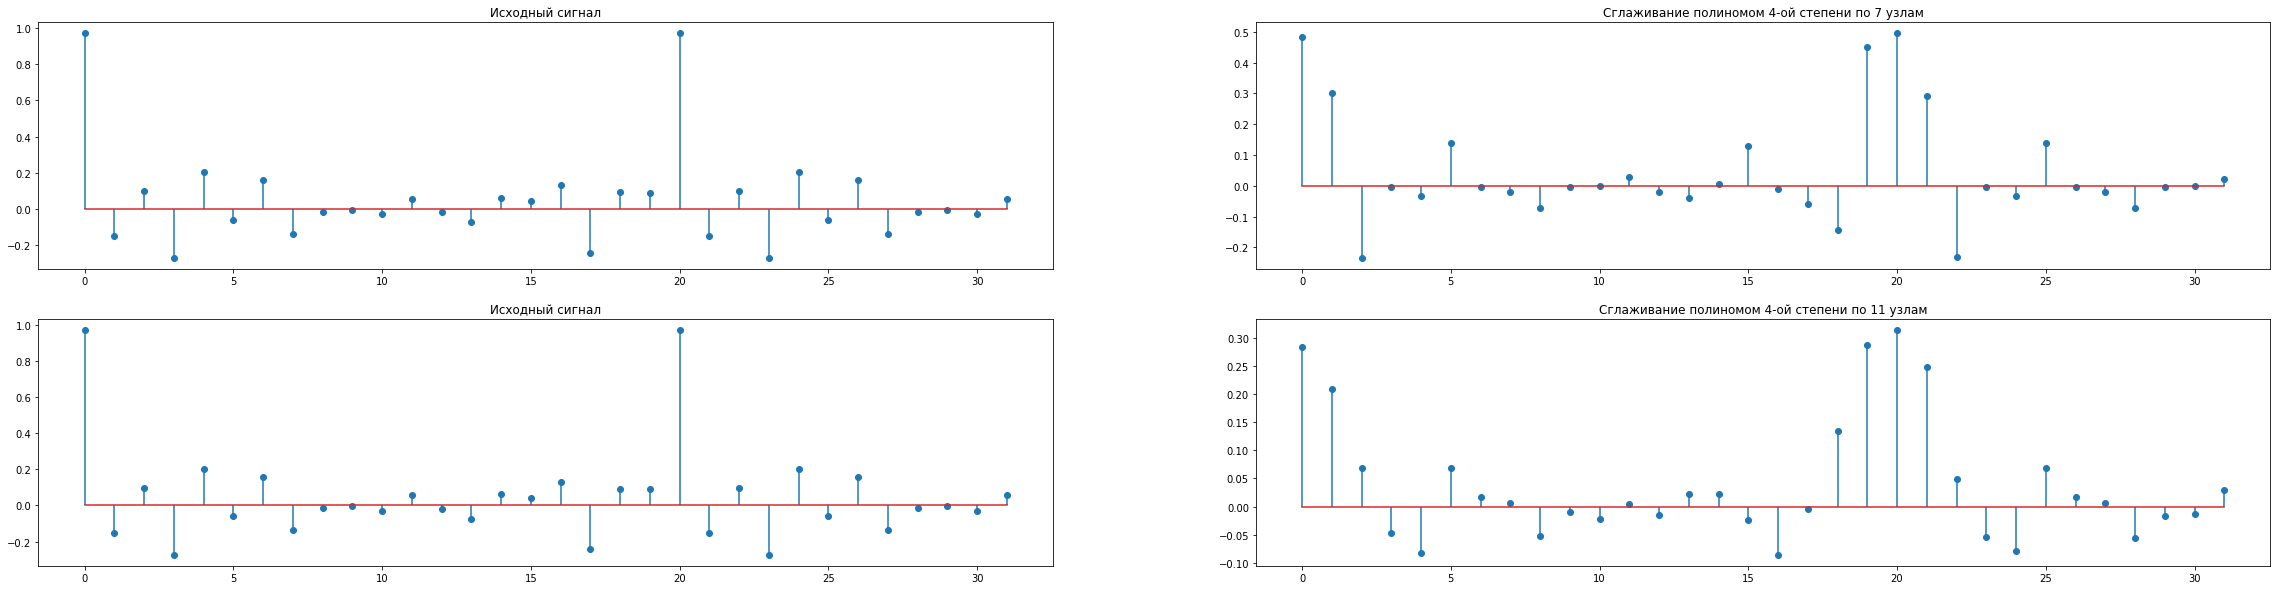

In [83]:
fig, axs = plt.subplots(2, 2)

plt.rcParams['figure.figsize'] = [40, 10]


axs[0][0].stem(x_, f(x_))
axs[0][0].set_title('Исходный сигнал')

axs[0][1].stem(x_, poly_7(f(x_)))
axs[0][1].set_title('Сглаживание полиномом 4-ой степени по 7 узлам')


axs[1][0].stem(x_, f(x_))
axs[1][0].set_title('Исходный сигнал')

axs[1][1].stem(x_, poly_11(f(x_)))
axs[1][1].set_title('Сглаживание полиномом 4-ой степени по 11 узлам')

plt.show()

#### Пункт 8.6b
С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала после его фильтрации и визуализировать их совместно с отчетами спектра исходного дискретного сигнала.

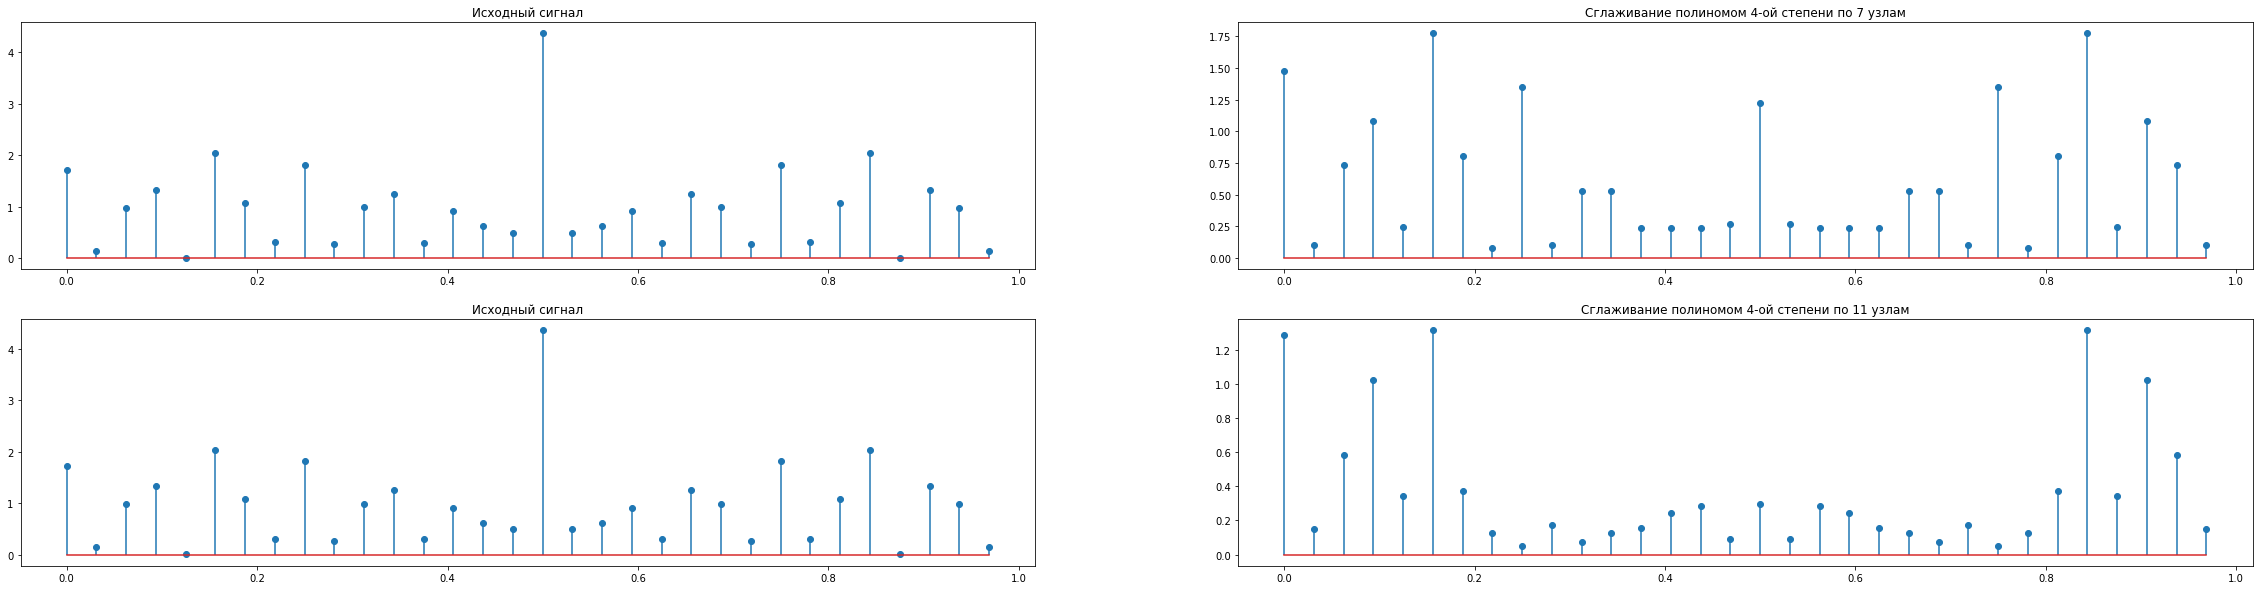

In [84]:
fig, axs = plt.subplots(2, 2)


freq_default, amp_default = DFT(f(x_))

axs[0][0].stem(freq_default, abs(amp_default))
axs[0][0].set_title('Исходный сигнал')

freq, amp = DFT(poly_7(f(x_)))

axs[0][1].stem(freq, abs(amp))
axs[0][1].set_title('Сглаживание полиномом 4-ой степени по 7 узлам')


axs[1][0].stem(freq_default, abs(amp_default))
axs[1][0].set_title('Исходный сигнал')

freq, amp = DFT(poly_11(f(x_)))

axs[1][1].stem(freq, abs(amp))
axs[1][1].set_title('Сглаживание полиномом 4-ой степени по 11 узлам')

plt.show()

#### Пункт 8.7b

Проанализировать результат на соответствие значениям H(ω). Сделать выводы.

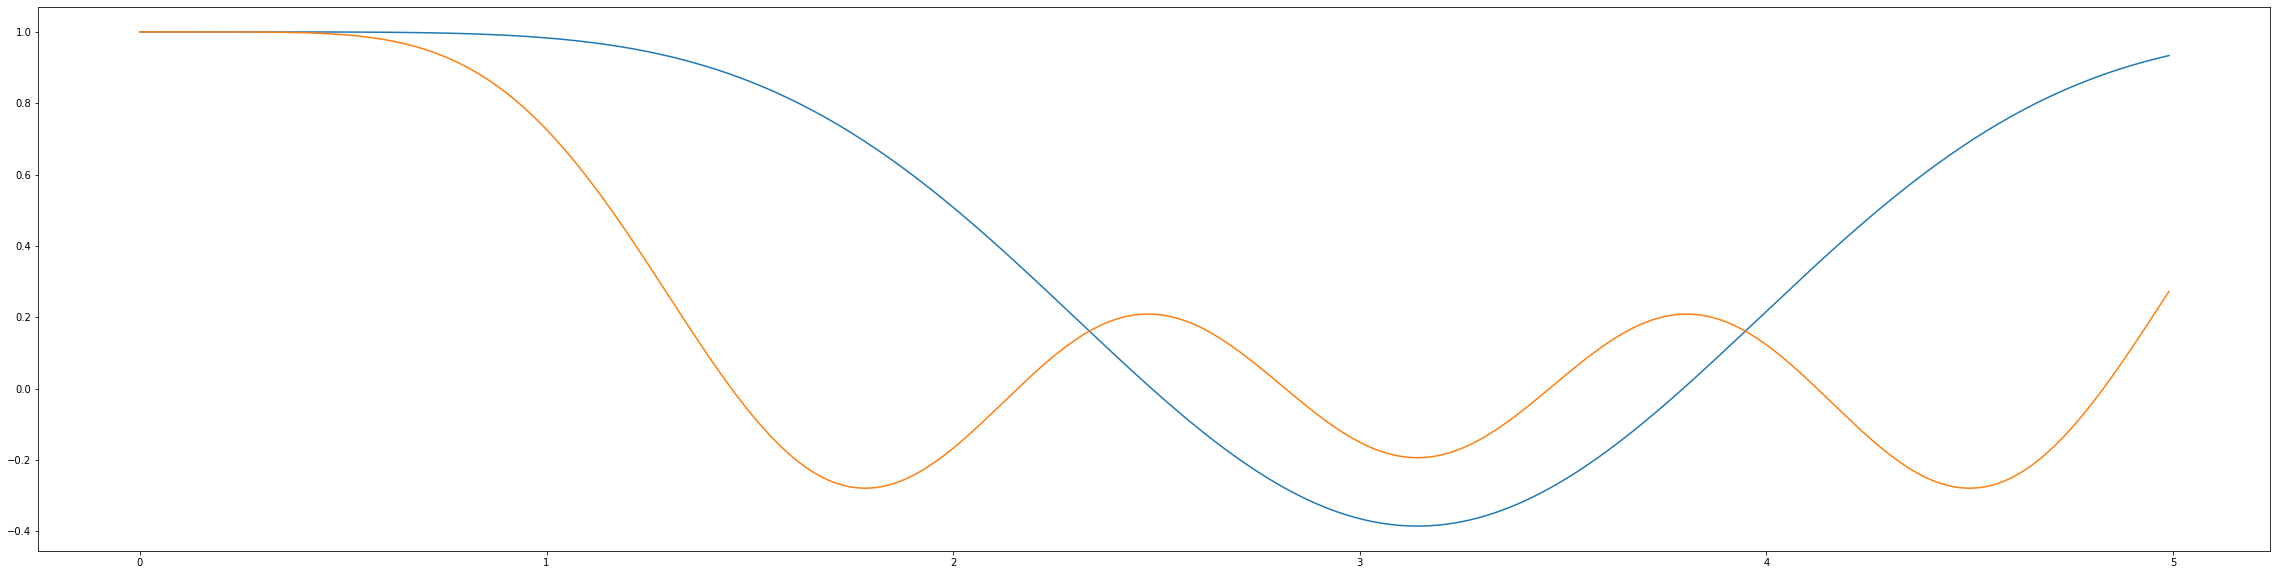

In [68]:
x = np.arange(0, 5, 0.01)

Hw5 = lambda w: 1/231*(150*np.cos(w) - 60*np.cos(2*w) + 10*np.cos(3*w) + 131)
Hw9 = lambda w: 1/429*(240*np.cos(w) + 120*np.cos(2*w) - 20*np.cos(3*w) -90*np.cos(4*w) + 36*np.cos(5*w) + 143)

plt.plot(x, Hw5(x), label='H(w)_5')
plt.plot(x, Hw9(x), label='H(w)_9')
plt.show()

Передаточные функции соответствуют полученным результатам дискретных отсчетов спектра дискретного сигнала после фильтрации.

### Выводы

В ходе выполнения лабораторной работы был сформирован дискретный сигнал посредством дискретизации аналогового сигнала. Для дискретного сигнала применялось сглаживание с помощью следующих фильтров:

- линейное сглаживание по 5-ти и 9-ти точкам
- сглаживание полиномом 2-ой степени по 5 и 9 узлам
- сглаживание полиномом 4-ой степени по 7 и 11 узлам

К отфильтрованным сигналам применялся ДПФ для поиска дискретных отсчетов спектра дискретного сигнала. Полученные данные сравнивались с соответственными значениями передаточных функций.